Indicator for classification:
1. True positive rate and false positive rate
2. Sensitivity(which is True positive rate) and Specificity
3. False negative rate and false positive rate

Indicatior for regression:
1. Mean Absolute error
2. R^2

Meta metrics indirectly check the model efficiency:
1. Fit/ Train time
2. Predict time
3. The data size need to store permanently.

In [2]:
from sklearn.model_selection import GridSearchCV

def get_best_model_and_accuracy(model, params, X, y):
    # if error report 0
    grid = GridSearchCV(model, params, error_score=0.)
    grid.fit(X, y)
    print("Best Accuracy: {}".format(grid.best_score_))
    print("Best Parameters: {}".format(grid.best_params_))
    # Fit time, we can use it to predict in real world.
    print("Average Time to Fit (s): {}".format(round(grid.cv_results_['mean_fit_time'].mean(), 3)))
    print("Averate Time to Score (s): {}".format(round(grid.cv_results_['mean_score_time'].mean(), 3)))

In [3]:
import pandas as pd
import numpy as np

np.random.seed(123)

# Dataset for credit card delay.
# archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients
url = "https://github.com/PacktPublishing/Feature-Engineering-Made-Easy/raw/master/Chapter05/credit_card_default.csv"
credit_card_default = pd.read_csv(url)

In [19]:
# .T transpose it to view better.
credit_card_default.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
PAY_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0


default payment next month is the thing we need to predict, others are characteristics.

In [4]:
credit_card_default.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [4]:
X = credit_card_default.drop('default payment next month', axis=1)
y = credit_card_default['default payment next month']

In [21]:
y.value_counts(normalize=True)

default payment next month
0    0.7788
1    0.2212
Name: proportion, dtype: float64

Null accuracy must be > 77.88%.

In [5]:
# Import four machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [6]:
# set Grid search params

# Logistic Regression
lr_params = {'C':[1e-1, 1e0, 1e1, 1e2], 'penalty':['l1', 'l2']}
# KNN
knn_params = {'n_neighbors': [1, 3, 5, 7]}
# Decision Tree
tree_params = {'max_depth':[None, 1, 3, 5, 7]}
# Random Forest
forest_params = {'n_estimators': [10, 50, 100], 'max_depth': [None, 1, 3, 5, 7]}

In [6]:
# we create blank state models and use gridsearch to fit in it
lr = LogisticRegression(max_iter=3000, solver='liblinear')
knn = KNeighborsClassifier()
d_tree = DecisionTreeClassifier()
forest = RandomForestClassifier()

In [14]:
#import warnings
#warnings.filterwarnings("ignore")
get_best_model_and_accuracy(lr, lr_params, X, y)

Best Accuracy: 0.8098666666666666
Best Parameters: {'C': 100.0, 'penalty': 'l1'}
Average Time to Fit (s): 1.108
Averate Time to Score (s): 0.005


Because Regression model need to make a huge matrix in fitting, but only a little scalar computation in predict, therefore there have huge time differences.

In [15]:
get_best_model_and_accuracy(knn, knn_params, X, y)

Best Accuracy: 0.7615333333333333
Best Parameters: {'n_neighbors': 7}
Average Time to Fit (s): 0.007
Averate Time to Score (s): 2.79


Knn fit much faster, because it use lazy learning, but at prediction it need to use Euclidean Distance to check which is the closest neighbor. Also, because if not normalized, features with high values will dominance the similarity and distance, leading a worser result than null accuracy.

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

knn_pipe_params = {'classifier__{}'.format(k): v for k, v in knn_params.items()}
# normalize params
knn_pipe = Pipeline([('scale', StandardScaler()), ('classifier', knn)])
# fitting fast but predict slow
get_best_model_and_accuracy(knn_pipe, knn_pipe_params, X, y)
print(knn_pipe_params)

NameError: name 'knn_params' is not defined

After normalize, it is nore accurate, but still slower and not accurate than logistic regression.

In [22]:
get_best_model_and_accuracy(d_tree, tree_params, X, y)

Best Accuracy: 0.8206333333333333
Best Parameters: {'max_depth': 3}
Average Time to Fit (s): 0.27
Averate Time to Score (s): 0.004


Decision tree has the best accuracy, and fitting or predict time are also faster than KNN.

In [23]:
get_best_model_and_accuracy(forest, forest_params, X, y)

Best Accuracy: 0.8207333333333333
Best Parameters: {'max_depth': 7, 'n_estimators': 100}
Average Time to Fit (s): 1.974
Averate Time to Score (s): 0.042


Random forest similar to decision tree, but use much more fitting time and predict time than decision tree. Decision tree has the highest accuracy and fastest predict time, so we will use it

We use Pearson correlations or hypothesis testing to get characteristic,they are univariate method, we can add each one by one into the pipeline.

In [11]:
credit_card_default.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,-0.249411,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,-0.055064,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,0.097520,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,0.035629,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,-0.053826,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,0.509426,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,0.622780,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,0.686775,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,0.819835,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614
PAY_5,-0.249411,-0.055064,0.097520,0.035629,-0.053826,0.509426,0.622780,0.686775,0.819835,1.000000,...,0.271915,0.269783,0.262509,-0.006089,-0.003191,0.009062,-0.058299,-0.033337,-0.023027,0.204149


<Axes: >

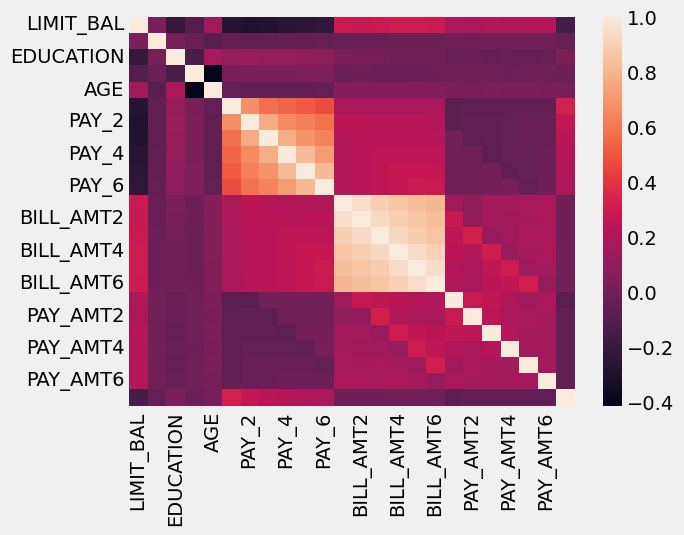

In [12]:
import seaborn as sns
import matplotlib.style as style

style.use('fivethirtyeight')
sns.heatmap(credit_card_default.corr())

In [13]:
credit_card_default.corr()['default payment next month']

LIMIT_BAL                    -0.153520
SEX                          -0.039961
EDUCATION                     0.028006
MARRIAGE                     -0.024339
AGE                           0.013890
PAY_0                         0.324794
PAY_2                         0.263551
PAY_3                         0.235253
PAY_4                         0.216614
PAY_5                         0.204149
PAY_6                         0.186866
BILL_AMT1                    -0.019644
BILL_AMT2                    -0.014193
BILL_AMT3                    -0.014076
BILL_AMT4                    -0.010156
BILL_AMT5                    -0.006760
BILL_AMT6                    -0.005372
PAY_AMT1                     -0.072929
PAY_AMT2                     -0.058579
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT5                     -0.055124
PAY_AMT6                     -0.053183
default payment next month    1.000000
Name: default payment next month, dtype: float64

We find the score near -1 and +1, therefore we filter the score larger than +/- 0.2.

In [14]:
credit_card_default.corr()['default payment next month'].abs() > .2

LIMIT_BAL                     False
SEX                           False
EDUCATION                     False
MARRIAGE                      False
AGE                           False
PAY_0                          True
PAY_2                          True
PAY_3                          True
PAY_4                          True
PAY_5                          True
PAY_6                         False
BILL_AMT1                     False
BILL_AMT2                     False
BILL_AMT3                     False
BILL_AMT4                     False
BILL_AMT5                     False
BILL_AMT6                     False
PAY_AMT1                      False
PAY_AMT2                      False
PAY_AMT3                      False
PAY_AMT4                      False
PAY_AMT5                      False
PAY_AMT6                      False
default payment next month     True
Name: default payment next month, dtype: bool

In [16]:
# save feature
highly_correlated_features = credit_card_default.columns[credit_card_default.corr()['default payment next month'].abs() > .2]
highly_correlated_features

Index(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'default payment next month'],
      dtype='object')

In [17]:
# drop predict column
highly_correlated_features = highly_correlated_features.drop('default payment next month')
highly_correlated_features

Index(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5'], dtype='object')

In [18]:
X_subsetted = X[highly_correlated_features]
get_best_model_and_accuracy(d_tree, tree_params, X_subsetted, y)

Best Accuracy: 0.8213333333333332
Best Parameters: {'max_depth': 3}
Average Time to Fit (s): 0.015
Averate Time to Score (s): 0.003


Use pipeline, first select and fit the highly correlated column, then transform dataset to subset, only include those rows

In [8]:
from sklearn.base import TransformerMixin, BaseEstimator

class CustomCorrelationChooser(TransformerMixin, BaseEstimator):
    def __init__(self, response, cols_to_keep=[], threshold=None):
        self.response = response
        self.threshold = threshold
        self.cols_to_keep = cols_to_keep
        
    def transform(self, X):
        return X[self.cols_to_keep]
    
    def fit(self, X, *_):
        # create df to store columns and response
        df = pd.concat([X, self.response], axis=1)
        # keep cols higher than threshold
        self.cols_to_keep = df.columns[df.corr()[df.columns[-1]].abs() > self.threshold]
        # remove response
        self.cols_to_keep = [c for c in self.cols_to_keep if c in X.columns]
        return self

In [21]:
# instantiate new feature selector
ccc = CustomCorrelationChooser(threshold=.2, response=y)
ccc.fit(X)

ccc.cols_to_keep

['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5']

In [22]:
ccc.transform(X).head()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5
0,2,2,-1,-1,-2
1,-1,2,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,-1,0,-1,0,0


In [13]:
from copy import deepcopy
# instantiate feature selector with response variable set
ccc = CustomCorrelationChooser(response=y)
# create pipeline and classifier
ccc_pipe = Pipeline([('correlation_select', ccc), ('classifier', d_tree)])
# copy params
# Decision Tree
tree_params = {'max_depth':[None, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19 ,21]}
tree_pipe_params = {'classifier__{}'.format(k): v for k, v in tree_params.items()}
ccc_pipe_params = deepcopy(tree_pipe_params)
# update params choose
ccc_pipe_params.update({'correlation_select__threshold':[0, .1, .2, .3]})

print(ccc_pipe_params)

NameError: name 'CustomCorrelationChooser' is not defined

In [38]:
get_best_model_and_accuracy(ccc_pipe, ccc_pipe_params, X, y)

Best Accuracy: 0.8207333333333333
Best Parameters: {'classifier__max_depth': 3, 'correlation_select__threshold': 0.2}
Average Time to Fit (s): 0.166
Averate Time to Score (s): 0.004


In [39]:
ccc = CustomCorrelationChooser(threshold=0.2, response=y)
ccc.fit(X)

CustomCorrelationChooser(cols_to_keep=['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
                                       'PAY_5'],
                         response=0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: int64,
                         threshold=0.2)

In [40]:
ccc.cols_to_keep

['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5']

https://www.youtube.com/watch?v=-FtlH4svqx4 Here is about hypothesis testing and p-value. Easy speaking, p-value calculate the significance level of the current event happen. Firstly, we have a null hypothesis, that something is not work, therefore, the mean will be same as before. But now, we have a result that is with a extreme mean, therefore, we calculate the probability of this happened, and found that it is lower than some value, such as <0.005. Because we got such extreme mean probability that is <0.005, therefore, the null hypothesis not hold, we have this mean because something must changed. Therefore, if p-value small enough, we said that it is too weak and not related to the null hypothesis. If large enough, we can't reject null hypothesis.

In [9]:
# SelectKBest: select k highest score after giving target function
from sklearn.feature_selection import SelectKBest

# ANOVA test
from sklearn.feature_selection import f_classif

# f_classif can use negative value, but not all class are supported
# chi2卡方 use frequently also, but only support positive value
# recusive analysis has its own null hypothesis

f_classif will do ANOVA test on each univariate, giving a p value. SelectKBest will rank the p value, the smaller the better.

In [10]:
# Select best 5 characteristic.
k_best = SelectKBest(f_classif, k=5)
k_best.fit_transform(X, y)

array([[ 2,  2, -1, -1, -2],
       [-1,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  0],
       ...,
       [ 4,  3,  2, -1,  0],
       [ 1, -1,  0,  0,  0],
       [ 0,  0,  0,  0,  0]])

In [11]:
k_best.pvalues_

array([1.30224395e-157, 4.39524880e-012, 1.22503803e-006, 2.48536389e-005,
       1.61368459e-002, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       1.89929659e-315, 1.12660795e-279, 7.29674048e-234, 6.67329549e-004,
       1.39573624e-002, 1.47699827e-002, 7.85556416e-002, 2.41634443e-001,
       3.52122521e-001, 1.14648761e-036, 3.16665676e-024, 1.84177029e-022,
       6.83094160e-023, 1.24134477e-021, 3.03358907e-020])

In [12]:
# check and sort p value
p_values = pd.DataFrame({'column': X.columns, 'p_value': k_best.pvalues_}).sort_values('p_value')
p_values.head()

,column,p_value
5,PAY_0,0.000000e+00
6,PAY_2,0.000000e+00
7,PAY_3,0.000000e+00
8,PAY_4,1.899297e-315
9,PAY_5,1.126608e-279


In [13]:
# cols with p_value less than 0.05 are important, we can filter and check them.
p_values[p_values['p_value'] < .05]

,column,p_value
5,PAY_0,0.000000e+00
6,PAY_2,0.000000e+00
7,PAY_3,0.000000e+00
8,PAY_4,1.899297e-315
9,PAY_5,1.126608e-279
10,PAY_6,7.296740e-234
0,LIMIT_BAL,1.302244e-157
17,PAY_AMT1,1.146488e-36
18,PAY_AMT2,3.166657e-24
20,PAY_AMT4,6.830942e-23


In [14]:
# cols with high p_values are filtered.
p_values[p_values['p_value'] >= .05]

,column,p_value
14,BILL_AMT4,0.078556
15,BILL_AMT5,0.241634
16,BILL_AMT6,0.352123


In [26]:
from copy import deepcopy
k_best = SelectKBest(f_classif)

# Piping with selectKBest
select_k_pipe = Pipeline([('k_best', k_best), ('classifier', d_tree)])
tree_params = {'max_depth':[None, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19 ,21]}
tree_pipe_params = {'classifier__{}'.format(k): v for k, v in tree_params.items()}
select_k_best_pipe_params = deepcopy(tree_pipe_params)
select_k_best_pipe_params.update({'k_best__k': list(range(1, 23)) + ['all']})

NameError: name 'SelectKBest' is not defined

In [17]:
get_best_model_and_accuracy(select_k_pipe, select_k_best_pipe_params, X, y)

Best Accuracy: 0.8213333333333332
Best Parameters: {'classifier__max_depth': 3, 'k_best__k': 5}
Average Time to Fit (s): 0.174
Averate Time to Score (s): 0.004


In [19]:
K_best = SelectKBest(f_classif, k=5)
p_values.head(5)

,column,p_value
5,PAY_0,0.000000e+00
6,PAY_2,0.000000e+00
7,PAY_3,0.000000e+00
8,PAY_4,1.899297e-315
9,PAY_5,1.126608e-279


In [20]:
# we can do a sanity check: if we use the features excluded these 5, will the accuracy lower?
the_worst_of_X = X[X.columns.drop(['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5'])]
get_best_model_and_accuracy(d_tree, tree_params, the_worst_of_X, y)

Best Accuracy: 0.788
Best Parameters: {'max_depth': 5}
Average Time to Fit (s): 0.368
Averate Time to Score (s): 0.004


We can check feature importance of the model

In [9]:
tree = DecisionTreeClassifier()
tree.fit(X, y)

importances = pd.DataFrame({'importance': tree.feature_importances_, 'feature': X.columns}).sort_values('importance', ascending=False)
importances.head()

,importance,feature
5,0.160912,PAY_0
4,0.073380,AGE
11,0.070934,BILL_AMT1
0,0.057065,LIMIT_BAL
19,0.053706,PAY_AMT3


Now we select from the inner indicator from model to define the importance, instead of using ANOVA p value to select the k best

In [7]:
# similar to SelectKBest, but not with statistical tests
from sklearn.feature_selection import SelectFromModel
# instead of choosing k value, SelectFromModel use threshold, anything larger than threshold
# will be included.
select_from_model = SelectFromModel(DecisionTreeClassifier(), threshold=.05)

selected_X = select_from_model.fit_transform(X, y)
selected_X.shape

(30000, 7)

In [11]:
tree_pipe_params = {'classifier__max_depth': [1, 3, 5, 7]}

from sklearn.pipeline import Pipeline

select = SelectFromModel(DecisionTreeClassifier())
select_from_pipe = Pipeline([('select', select), ('classifier', d_tree)])
select_from_pipe_params = deepcopy(tree_pipe_params)
# mean will select the characteristic larger than mean, median will select larger than median,
# 2.*mean is select the characteristic twice importance as mean.
select_from_pipe_params.update({
              'select__threshold': [.01, .05, .1, "mean", "median", "2.*mean"],
              'select__estimator__max_depth': [None, 1, 3, 5, 7]
              })

print(select_from_pipe_params)

NameError: name 'd_tree' is not defined

In [26]:
get_best_model_and_accuracy(select_from_pipe, select_from_pipe_params, X, y)

Best Accuracy: 0.8211666666666666
Best Parameters: {'classifier__max_depth': 3, 'select__estimator__max_depth': None, 'select__threshold': 0.01}
Average Time to Fit (s): 0.317
Averate Time to Score (s): 0.004


In [27]:
# set Pipeline best params.
select_from_pipe.set_params(**{'select__threshold': 0.01, 'select__estimator__max_depth': None,
                              'classifier__max_depth': 3})
#fitting data
select_from_pipe.steps[0][1].fit(X, y)
# list chosen columns
X.columns[select_from_pipe.steps[0][1].get_support()]

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

We can use Lp-norm regularization, L1 lasso regularization will make some variable become 0, so it is good when there are many useless variable and we need to eliminate some or decrease dimension, such as if there are 2 variable, we need x and y, which means at least 2 data, but sometimes data is not enough, we will use l1 to decrease dimension. L2 ridge won't make variable disappeared, but tend to 0, it is useful when we know many of the variables in the list are useful and don't want to eliminate them.
1. https://www.youtube.com/watch?v=Q81RR3yKn30
2. https://www.youtube.com/watch?v=NGf0voTMlcs

In [27]:
# we use regularized Regression to select
logistic_selector = SelectFromModel(LogisticRegression(max_iter=1000, solver='liblinear'))

# New pipeline with LogisticRegression params
regularization_pipe = Pipeline([('select', logistic_selector), ('classifier', tree)])

regularization_pipe_params = deepcopy(tree_pipe_params)

# L1 and L2 regularization
regularization_pipe_params.update({'select__threshold': [.01, .05, .1, "mean", "median", "2.*mean"],
                                   'select__estimator__penalty': ['l1', 'l2'],})

print(regularization_pipe_params)

{'classifier__max_depth': [1, 3, 5, 7], 'select__threshold': [0.01, 0.05, 0.1, 'mean', 'median', '2.*mean'], 'select__estimator__penalty': ['l1', 'l2']}


In [28]:
get_best_model_and_accuracy(regularization_pipe, regularization_pipe_params, X, y)

/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/opt/

Best Accuracy: 0.8212666666666667
Best Parameters: {'classifier__max_depth': 3, 'select__estimator__penalty': 'l1', 'select__threshold': 0.05}
Average Time to Fit (s): 0.959
Averate Time to Score (s): 0.003


In [33]:
# we set the best params now
regularization_pipe.set_params(**{'select__threshold': 0.01, 'classifier__max_depth':5,
                                  'select__estimator__penalty': 'l1'})

# fit data
regularization_pipe.steps[0][1].fit(X, y)

# list selected col
X.columns[regularization_pipe.steps[0][1].get_support()]

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
       'PAY_5'],
      dtype='object')

We use support vector machine classifier, it is a classification model, drawing line bondaries and use binary labels for classification. Regression classifier vs support vector classification: SVC will maximize the accuracy but regression classifier have better characteristic to modelling.

In [26]:
from sklearn.svm import LinearSVC

# use SVC to take parameter
svc_selector = SelectFromModel(LinearSVC(dual=False))

svc_pipe = Pipeline([('select', svc_selector), ('classifier', tree)])
svc_pipe_params = deepcopy(tree_pipe_params)

svc_pipe_params.update({'select__threshold':[.01, .05, .1, "mean", "median", "2.*mean"],
                        'select__estimator__penalty': ['l1', 'l2'],
                        'select__estimator__loss': ['squared_hinge', 'hinge'],
                        'select__estimator__dual': [True, False]})

print(svc_pipe_params)

{'classifier__max_depth': [1, 3, 5, 7], 'select__threshold': [0.01, 0.05, 0.1, 'mean', 'median', '2.*mean'], 'select__estimator__penalty': ['l1', 'l2'], 'select__estimator__loss': ['squared_hinge', 'hinge'], 'select__estimator__dual': [True, False]}


In [27]:
get_best_model_and_accuracy(svc_pipe, svc_pipe_params, X, y)

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/feature_selection/_base.py:96: UserWarning: No 

Best Accuracy: 0.8212666666666667
Best Parameters: {'classifier__max_depth': 3, 'select__estimator__dual': False, 'select__estimator__loss': 'squared_hinge', 'select__estimator__penalty': 'l1', 'select__threshold': 'mean'}
Average Time to Fit (s): 1.972
Averate Time to Score (s): 0.001


In [30]:
# select the best params for pipeline.
svc_pipe.set_params(**{'select__estimator__loss': 'squared_hinge', 'select__threshold': 'mean',
                       'select__estimator__penalty':'l1', 'classifier__max_depth':3,
                       'select__estimator__dual': False})

svc_pipe.steps[0][1].fit(X, y)

X.columns[svc_pipe.steps[0][1].get_support()]

Index(['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_0', 'PAY_2', 'PAY_3'], dtype='object')

We see that it remove PAY_4 and PAY_5 for best params.

# Conclusion:
1. If most features are categorical, we should use SelectKBest with Chi ranker or tree based selector.
2. If most features are quantitative, use linear model and rely on correlation.
3. If it is a binary classification problem, use SelectFromModel and SVC, because SVC will try to find best coefficient for binary classification problem.
4. Using Exploratory Data Analysis(探索式資料分析) is useful before manual selection.